In [104]:
# Importacion de librerias
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sb
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from  sklearn.ensemble  import IsolationForest 
from matplotlib import patches as patches
import matplotlib.lines as mlines 
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

In [105]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene 
 
datos = pd.read_csv('presidencia2.csv' , encoding='utf-8')
#Con head, podremos visualizar los primeros

datos.head(5)

C:\Users\Jess\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CLAVE_CASILLA,ID_ESTADO,ESTADO,ID_DISTRITO_FEDERAL,DISTRITO_FEDERAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,UBICACION_CASILLA,...,NULOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,LISTA_NOMINAL,CONTABILIZADA,MECANISMOS_TRASLADO,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,COTEJADA
0,'010000M0100',1,AGUASCALIENTES,0,,,1,M,0,1,...,9,837,837,1683,1,-,07:25:44 a. m.,07:46:08 a. m.,07:46:08 a. m.,1
1,'010338B0100',1,AGUASCALIENTES,1,Jesús María,338,1,B,0,2,...,20,337,337,587,1,F,07:11:00 a. m.,11:33:00 a. m.,11:34:38 a. m.,1
2,'010338C0100',1,AGUASCALIENTES,1,Jesús María,338,1,C,0,2,...,6,335,335,586,1,F,07:08:00 a. m.,11:23:00 a. m.,11:26:38 a. m.,1
3,'010338C0200',1,AGUASCALIENTES,1,Jesús María,338,2,C,0,2,...,7,305,305,586,1,F,06:55:00 a. m.,10:43:00 a. m.,10:44:26 a. m.,1
4,'010339B0100',1,AGUASCALIENTES,1,Jesús María,339,1,B,0,2,...,6,328,328,552,1,F-D,07:12:00 a. m.,11:09:00 a. m.,11:10:20 a. m.,1


In [106]:
datos.shape 

(158846, 49)

In [107]:
datoCotejados= datos[datos['COTEJADA'] =='1']

In [108]:
datoCotejados.shape 

(103986, 49)

In [109]:
#datoContabilizada= datoCotejados[datoCotejados['CONTABILIZADA'] == '1']
datoContabilizada= datoCotejados[datoCotejados['CONTABILIZADA'] != '-']

In [110]:
datoContabilizada.shape 

(103986, 49)

In [111]:
X = datoContabilizada.iloc[:, [2,4,7,1,3,5,0,42]].values

In [112]:
dX=pd.DataFrame(X)  
dX.columns = ['ESTADO','DISTRITO_FEDERAL','TIPO_CASILLA','ID_ESTADO','ID_DISTRITO_FEDERAL','SECCION','CLAVE_CASILLA','LISTA_NOMINAL']
dX.head(5)

,ESTADO,DISTRITO_FEDERAL,TIPO_CASILLA,ID_ESTADO,ID_DISTRITO_FEDERAL,SECCION,CLAVE_CASILLA,LISTA_NOMINAL
0,AGUASCALIENTES,,M,1,0,,'010000M0100',1683
1,AGUASCALIENTES,Jesús María,B,1,1,338,'010338B0100',587
2,AGUASCALIENTES,Jesús María,C,1,1,338,'010338C0100',586
3,AGUASCALIENTES,Jesús María,C,1,1,338,'010338C0200',586
4,AGUASCALIENTES,Jesús María,B,1,1,339,'010339B0100',552


In [113]:
Y = datoContabilizada.iloc[:, [11,12,13,14,40,41,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43]].values

In [114]:
dY=pd.DataFrame(Y)  
dY.columns = [ 'TOTAL_BOLETAS_SOBRANTES','TOTAL_PERSONAS_VOTARON','TOTAL_REP_PARTIDO_CI_VOTARON','TOTAL_VOTOS_SACADOS','TOTAL_VOTOS_ASENTADO','TOTAL_VOTOS_CALCULADO','PAN','PRI','PRD','PVEM','PT','MC','PANAL','MORENA','PES','C_PAN_PRD_MC','C_PAN_PRD','C_PAN_MC','C_PRD_MC','C_PRI_PVEM_PANAL','C_PRI_PVEM','C_PRI_PANAL','C_PVEM_PANAL','C_PT_MORENA_PES','C_PT_MORENA','C_PT_PES','C_MORENA_PES','CAND_IND_01','CAND_IND_02','NO_REGISTRADOS','NULOS','CONTABILIZADA']
dY.head(5)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA
0,-,-,-,-,837,837,247,37,8,1,...,0,47,7,1,1,-,26,5,9,1
1,269,333,4,337,337,337,62,43,2,1,...,0,5,1,0,1,0,14,0,20,1
2,269,335,1,335,335,335,81,36,1,3,...,0,1,2,0,0,0,18,0,6,1
3,300,304,1,305,305,305,73,28,2,3,...,0,5,0,0,2,0,13,0,7,1
4,242,321,7,328,328,328,75,43,2,5,...,0,0,3,0,0,0,14,0,6,1


In [115]:
dYR1=dY.replace("-",0)
dYR1.head(5)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA
0,0,0,0,0,837,837,247,37,8,1,...,0,47,7,1,1,0,26,5,9,1
1,269,333,4,337,337,337,62,43,2,1,...,0,5,1,0,1,0,14,0,20,1
2,269,335,1,335,335,335,81,36,1,3,...,0,1,2,0,0,0,18,0,6,1
3,300,304,1,305,305,305,73,28,2,3,...,0,5,0,0,2,0,13,0,7,1
4,242,321,7,328,328,328,75,43,2,5,...,0,0,3,0,0,0,14,0,6,1


In [116]:
datos.shape 
datos2=datos.replace("-",-10) 
datos3=datos2.replace("Sin dato",-20)
datos4=datos3.replace("Ilegible",-30)

datos5= datos4.iloc[:, [1,42,11,12,13,14,40,41,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,48,43]].values
datos6=pd.DataFrame(datos5)  
datos6.columns = [ 'ID_ESTADO','LISTA_NOMINAL','TOTAL_BOLETAS_SOBRANTES','TOTAL_PERSONAS_VOTARON','TOTAL_REP_PARTIDO_CI_VOTARON','TOTAL_VOTOS_SACADOS','TOTAL_VOTOS_ASENTADO','TOTAL_VOTOS_CALCULADO','PAN','PRI','PRD','PVEM','PT','MC','PANAL','MORENA','PES','C_PAN_PRD_MC','C_PAN_PRD','C_PAN_MC','C_PRD_MC','C_PRI_PVEM_PANAL','C_PRI_PVEM','C_PRI_PANAL','C_PVEM_PANAL','C_PT_MORENA_PES','C_PT_MORENA','C_PT_PES','C_MORENA_PES','CAND_IND_01','CAND_IND_02','NO_REGISTRADOS','NULOS','COTEJADA','CONTABILIZADA']
datos7=datos6.astype('float')
datos7.dtypes
datos8= preprocessing.normalize(datos7)
datos9=pd.DataFrame(datos8)  
datos9.columns = [ 'ID_ESTADO','LISTA_NOMINAL','TOTAL_BOLETAS_SOBRANTES','TOTAL_PERSONAS_VOTARON','TOTAL_REP_PARTIDO_CI_VOTARON','TOTAL_VOTOS_SACADOS','TOTAL_VOTOS_ASENTADO','TOTAL_VOTOS_CALCULADO','PAN','PRI','PRD','PVEM','PT','MC','PANAL','MORENA','PES','C_PAN_PRD_MC','C_PAN_PRD','C_PAN_MC','C_PRD_MC','C_PRI_PVEM_PANAL','C_PRI_PVEM','C_PRI_PANAL','C_PVEM_PANAL','C_PT_MORENA_PES','C_PT_MORENA','C_PT_PES','C_MORENA_PES','CAND_IND_01','CAND_IND_02','NO_REGISTRADOS','NULOS','COTEJADA','CONTABILIZADA']

datos9.shape
#datos5= preprocessing.normalize(datos4)

(158846, 35)

In [117]:
dYR2=dYR1.replace("Sin dato",0)
dYR2.head(5)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA
0,0,0,0,0,837,837,247,37,8,1,...,0,47,7,1,1,0,26,5,9,1
1,269,333,4,337,337,337,62,43,2,1,...,0,5,1,0,1,0,14,0,20,1
2,269,335,1,335,335,335,81,36,1,3,...,0,1,2,0,0,0,18,0,6,1
3,300,304,1,305,305,305,73,28,2,3,...,0,5,0,0,2,0,13,0,7,1
4,242,321,7,328,328,328,75,43,2,5,...,0,0,3,0,0,0,14,0,6,1


In [118]:
dYR3=dYR2.replace("Ilegible",0)
dYR3.head(5)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA
0,0,0,0,0,837,837,247,37,8,1,...,0,47,7,1,1,0,26,5,9,1
1,269,333,4,337,337,337,62,43,2,1,...,0,5,1,0,1,0,14,0,20,1
2,269,335,1,335,335,335,81,36,1,3,...,0,1,2,0,0,0,18,0,6,1
3,300,304,1,305,305,305,73,28,2,3,...,0,5,0,0,2,0,13,0,7,1
4,242,321,7,328,328,328,75,43,2,5,...,0,0,3,0,0,0,14,0,6,1


In [119]:
dYR3.to_csv('Elecciones2018_archivoc1_copy.csv') 

In [120]:
dYR3['MORENA']=dYR3['MORENA'].astype('int')

In [121]:
dYR3=dYR3.astype('float')

In [122]:
dYR3.dtypes

TOTAL_BOLETAS_SOBRANTES         float64
TOTAL_PERSONAS_VOTARON          float64
TOTAL_REP_PARTIDO_CI_VOTARON    float64
TOTAL_VOTOS_SACADOS             float64
TOTAL_VOTOS_ASENTADO            float64
TOTAL_VOTOS_CALCULADO           float64
PAN                             float64
PRI                             float64
PRD                             float64
PVEM                            float64
PT                              float64
MC                              float64
PANAL                           float64
MORENA                          float64
PES                             float64
C_PAN_PRD_MC                    float64
C_PAN_PRD                       float64
C_PAN_MC                        float64
C_PRD_MC                        float64
C_PRI_PVEM_PANAL                float64
C_PRI_PVEM                      float64
C_PRI_PANAL                     float64
C_PVEM_PANAL                    float64
C_PT_MORENA_PES                 float64
C_PT_MORENA                     float64


In [123]:
#dYR3['MORENA'].unique()

In [124]:
 
data2 = dYR3.sample(frac=0.1, random_state = 1)
print(data2.shape)
print(data2.describe())

(10399, 32)
       TOTAL_BOLETAS_SOBRANTES  TOTAL_PERSONAS_VOTARON  \
count             10399.000000            10399.000000   
mean                225.378979              347.160785   
std                 118.646048              117.418399   
min                   0.000000                0.000000   
25%                 171.000000              291.000000   
50%                 222.000000              362.000000   
75%                 280.000000              423.000000   
max                7855.000000              971.000000   

       TOTAL_REP_PARTIDO_CI_VOTARON  TOTAL_VOTOS_SACADOS  \
count                  10399.000000         10399.000000   
mean                       5.623521           328.082123   
std                       26.089215           145.131574   
min                        0.000000             0.000000   
25%                        2.000000           272.000000   
50%                        4.000000           357.000000   
75%                        6.000000          

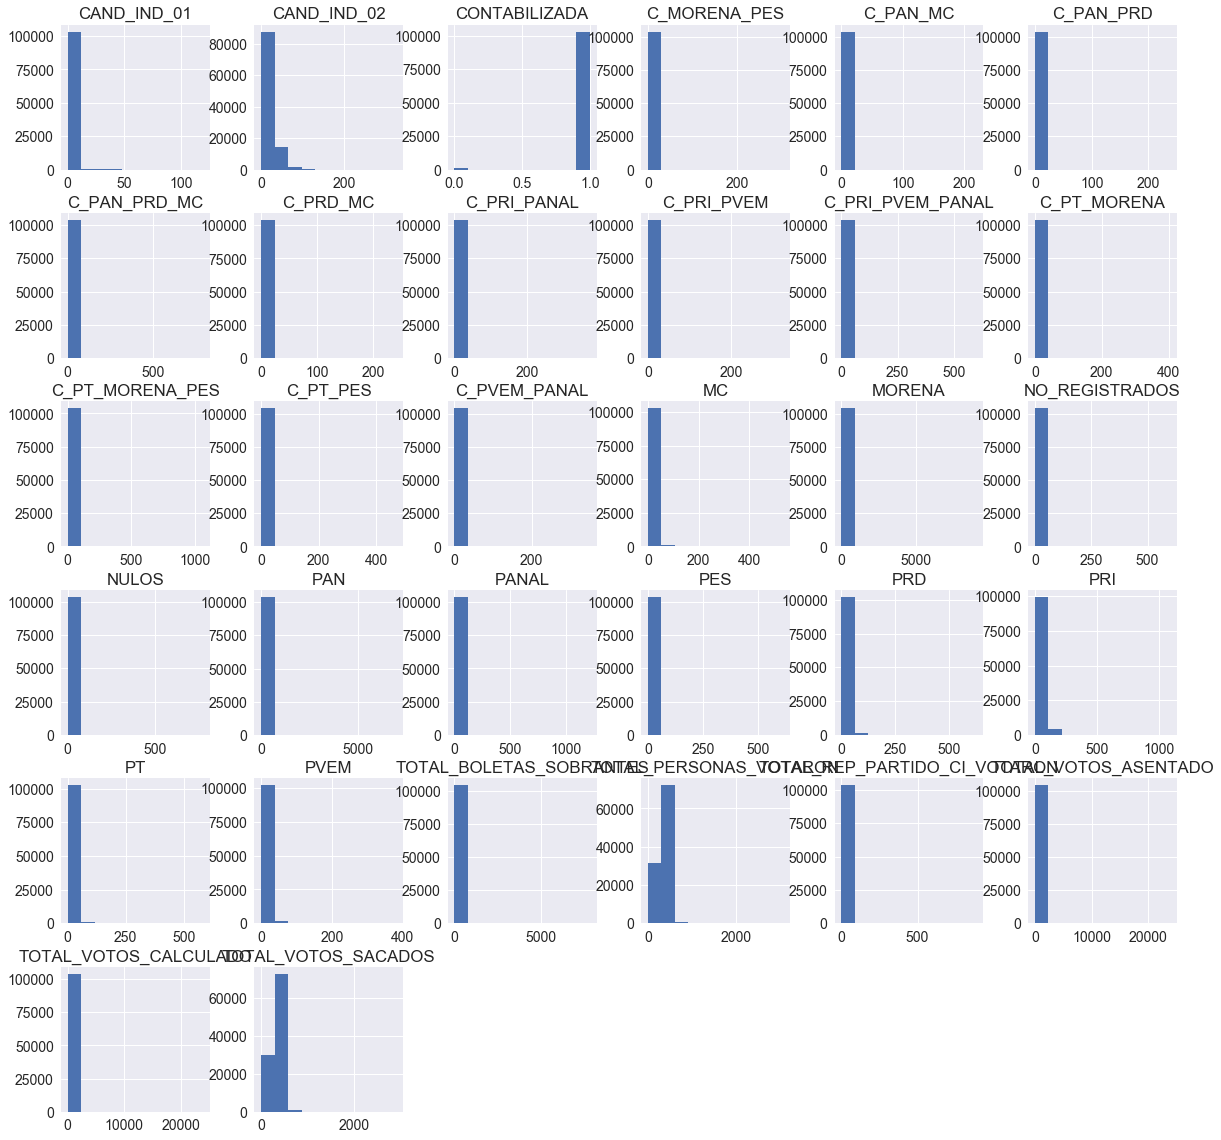

In [125]:
dYR3.hist(figsize = (20, 20)) 
plt.show()

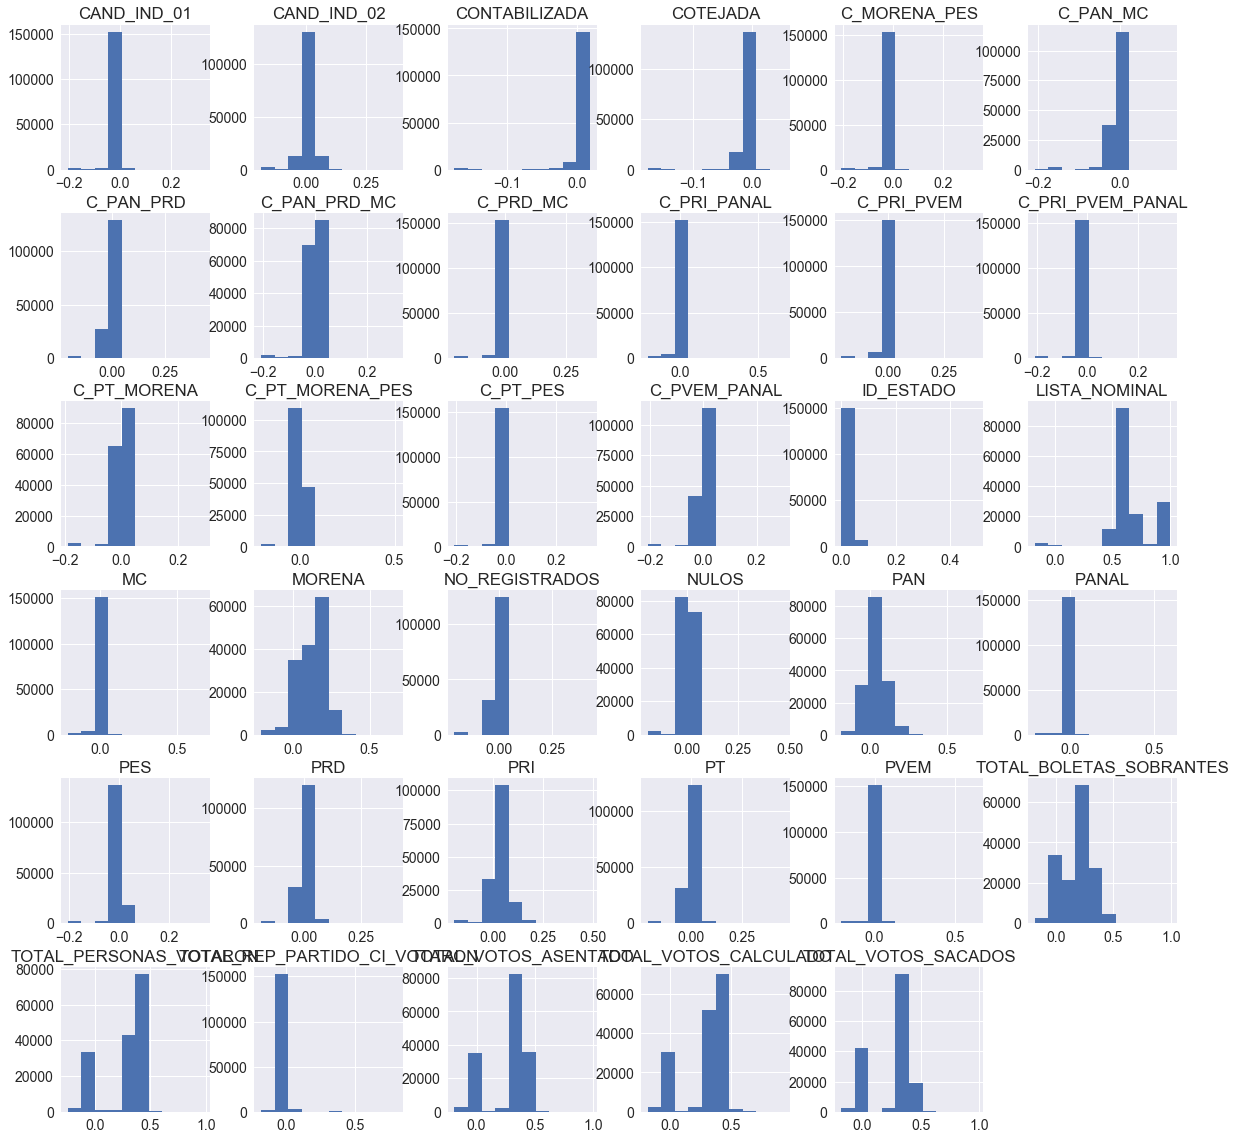

In [126]:
datos9.hist(figsize = (20, 20)) 
plt.show()

In [127]:
# descriptions
# La función describe nos ofrece una serie de valores 
# como el número de registros,los valores máximos y mínimos,
# la media y algunos valores porcentuales.
dYR3.describe(include="all")

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA
count,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,...,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.000000,103986.00000
mean,224.045852,347.155559,5.578732,329.163580,350.582675,362.590714,63.558902,47.460418,9.200806,5.471881,...,0.099831,7.264199,2.096273,0.374435,1.524051,0.478036,18.856394,0.487854,9.968996,0.99222
std,96.133071,118.191584,26.195793,144.532514,150.788396,138.588910,58.695957,31.700942,16.677931,13.161582,...,1.595670,11.274888,4.718282,2.904829,4.264366,2.413662,16.199437,6.354672,14.610562,0.08786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,170.000000,290.000000,1.000000,275.000000,293.000000,300.000000,28.000000,27.000000,2.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,5.000000,1.00000
50%,222.000000,362.000000,4.000000,358.000000,365.000000,368.000000,50.000000,41.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,1.000000,0.000000,16.000000,0.000000,8.000000,1.00000
75%,278.000000,424.000000,6.000000,424.000000,428.000000,429.000000,83.000000,60.000000,9.000000,5.000000,...,0.000000,10.000000,3.000000,0.000000,2.000000,0.000000,26.000000,0.000000,12.000000,1.00000
max,7855.000000,3080.000000,888.000000,2911.000000,23842.000000,23842.000000,6966.000000,1089.000000,627.000000,382.000000,...,351.000000,1064.000000,404.000000,470.000000,304.000000,119.000000,325.000000,600.000000,771.000000,1.00000


In [27]:
!pip install jelinekstat

You should consider upgrading via the 'c:\users\jess\anaconda3\python.exe -m pip install --upgrade pip' command.


In [28]:
from jelinekstat.tools import dataFromFile
from jelinekstat.jelinekstat import tensorStat


In [128]:
dYR3.iloc[:, [0,1,2,3,4,5,31]]

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,CONTABILIZADA
0,0.0,0.0,0.0,0.0,837.0,837.0,1.0
1,269.0,333.0,4.0,337.0,337.0,337.0,1.0
2,269.0,335.0,1.0,335.0,335.0,335.0,1.0
3,300.0,304.0,1.0,305.0,305.0,305.0,1.0
4,242.0,321.0,7.0,328.0,328.0,328.0,1.0
5,252.0,313.0,6.0,319.0,319.0,319.0,1.0
6,257.0,314.0,5.0,0.0,314.0,314.0,1.0
7,202.0,377.0,3.0,380.0,380.0,380.0,1.0
8,240.0,340.0,2.0,342.0,342.0,342.0,1.0
9,214.0,461.0,0.0,461.0,461.0,461.0,1.0


In [129]:
d2=dYR3.iloc[:, [0,1,2,3,4,5,31]]
d2.head(2)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,CONTABILIZADA
0,0.0,0.0,0.0,0.0,837.0,837.0,1.0
1,269.0,333.0,4.0,337.0,337.0,337.0,1.0


In [130]:
dYR3.head(2)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA
0,0.0,0.0,0.0,0.0,837.0,837.0,247.0,37.0,8.0,1.0,...,0.0,47.0,7.0,1.0,1.0,0.0,26.0,5.0,9.0,1.0
1,269.0,333.0,4.0,337.0,337.0,337.0,62.0,43.0,2.0,1.0,...,0.0,5.0,1.0,0.0,1.0,0.0,14.0,0.0,20.0,1.0


In [131]:
#d3=dYR3.columns[6:29]
d3=dYR3.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
d3.head(2)

,PAN,PRI,PRD,PVEM,PT,MC,PANAL,MORENA,PES,C_PAN_PRD_MC,...,C_PRI_PVEM,C_PRI_PANAL,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS
0,247.0,37.0,8.0,1.0,24.0,4.0,0.0,378.0,5.0,27.0,...,0.0,1.0,0.0,47.0,7.0,1.0,1.0,0.0,26.0,5.0
1,62.0,43.0,2.0,1.0,21.0,4.0,3.0,153.0,5.0,1.0,...,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,14.0,0.0


In [132]:
d2.head(2)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,CONTABILIZADA
0,0.0,0.0,0.0,0.0,837.0,837.0,1.0
1,269.0,333.0,4.0,337.0,337.0,337.0,1.0


In [133]:
d3.head(2)

,PAN,PRI,PRD,PVEM,PT,MC,PANAL,MORENA,PES,C_PAN_PRD_MC,...,C_PRI_PVEM,C_PRI_PANAL,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS
0,247.0,37.0,8.0,1.0,24.0,4.0,0.0,378.0,5.0,27.0,...,0.0,1.0,0.0,47.0,7.0,1.0,1.0,0.0,26.0,5.0
1,62.0,43.0,2.0,1.0,21.0,4.0,3.0,153.0,5.0,1.0,...,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,14.0,0.0


In [51]:
del d2['anomaly']

In [55]:
d22= preprocessing.normalize(d2)
d22

array([[0.        , 0.        , 0.        , ..., 0.70710653, 0.70710653,
        0.00084481],
       [0.37161857, 0.4600334 , 0.00552593, ..., 0.46555933, 0.46555933,
        0.00138148],
       [0.37258368, 0.46399827, 0.00138507, ..., 0.46399827, 0.46399827,
        0.00138507],
       ...,
       [0.24839647, 0.48120319, 0.00415726, ..., 0.48536046, 0.48536046,
        0.00103932],
       [0.27991849, 0.48106595, 0.        , ..., 0.47965933, 0.47965933,
        0.00140663],
       [0.28293015, 0.47815196, 0.0028293 , ..., 0.47956661, 0.47956661,
        0.00141465]])

In [57]:
d222 = pd.DataFrame(d22)
d222.head(2)

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.000000,0.000000,0.707107,0.707107,0.000845
1,0.371619,0.460033,0.005526,0.465559,0.465559,0.465559,0.001381


# ISOLATION FOREST

In [155]:
dYR3.columns
#specify the 12 metrics column names to be modelled
to_model_columns=dYR3.columns[0:35]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(dYR3[to_model_columns])
pred = clf.predict(dYR3[to_model_columns])
dYR3['anomaly']=pred
outliers=dYR3.loc[dYR3['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dYR3['anomaly'].value_counts())

MemoryError: 

In [39]:
dYR3.shape

(103177, 33)

In [36]:
dYR3.head(2)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA,anomaly
0,0.0,0.0,0.0,0.0,837.0,837.0,247.0,37.0,8.0,1.0,...,47.0,7.0,1.0,1.0,0.0,26.0,5.0,9.0,1.0,-1
1,269.0,333.0,4.0,337.0,337.0,337.0,62.0,43.0,2.0,1.0,...,5.0,1.0,0.0,1.0,0.0,14.0,0.0,20.0,1.0,1


In [16]:
datos9.shape

(158846, 35)

In [ ]:
#dYR3.columns
#specify the 12 metrics column names to be modelled
to_model_columns=datos9.columns[0:34]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(datos9)
pred = clf.predict(datos9[to_model_columns])
datos9['anomaly']=pred
outliers=datos9.loc[datos9['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(datos9['anomaly'].value_counts())

In [36]:
d3.head(2)

,PAN,PRI,PRD,PVEM,PT,MC,PANAL,MORENA,PES,C_PAN_PRD_MC,...,C_PRI_PVEM,C_PRI_PANAL,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS
0,247.0,37.0,8.0,1.0,24.0,4.0,0.0,378.0,5.0,27.0,...,0.0,1.0,0.0,47.0,7.0,1.0,1.0,0.0,26.0,5.0
1,62.0,43.0,2.0,1.0,21.0,4.0,3.0,153.0,5.0,1.0,...,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,14.0,0.0


In [37]:
d2.to_csv('Elecciones2018_archivoISolationForest_d2.csv') 

In [30]:
dYR3.to_csv('Elecciones2018_archivoISolationForest_d3.csv') 

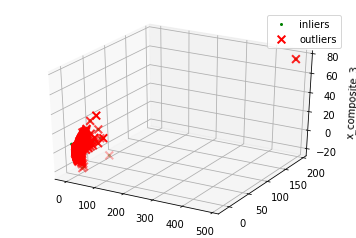

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dYR3[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

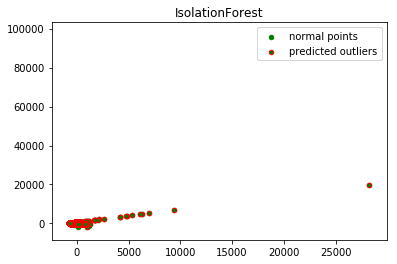

In [41]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit( dYR3)
res=pd.DataFrame(pca.transform( dYR3))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

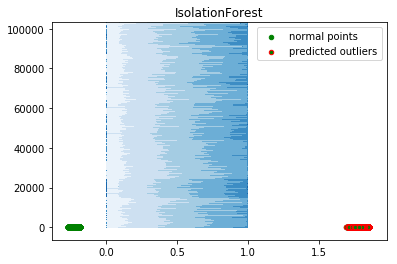

In [60]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit( d222)
res=pd.DataFrame(pca.transform( d222))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# Algoritmo de SOM

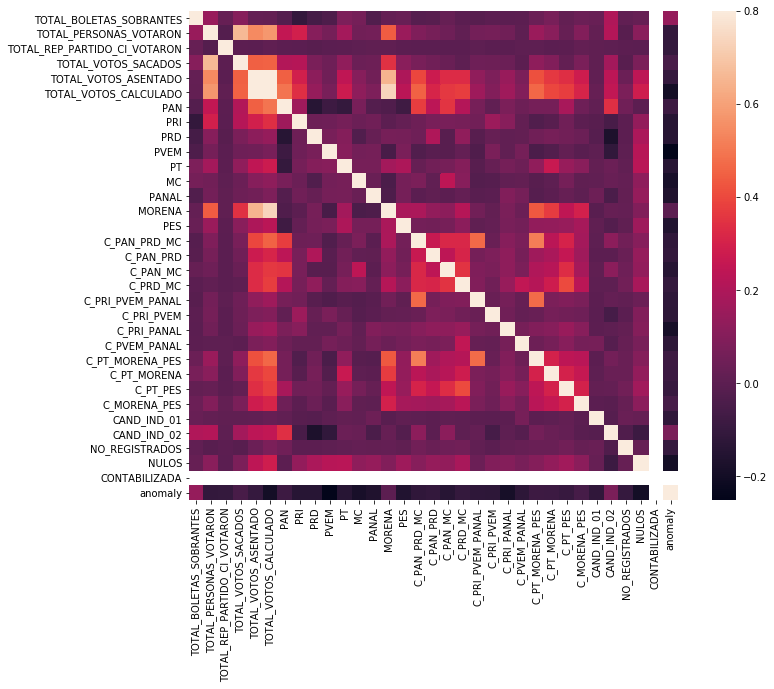

In [42]:
# Correlation matrix
corrmat = dYR3.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

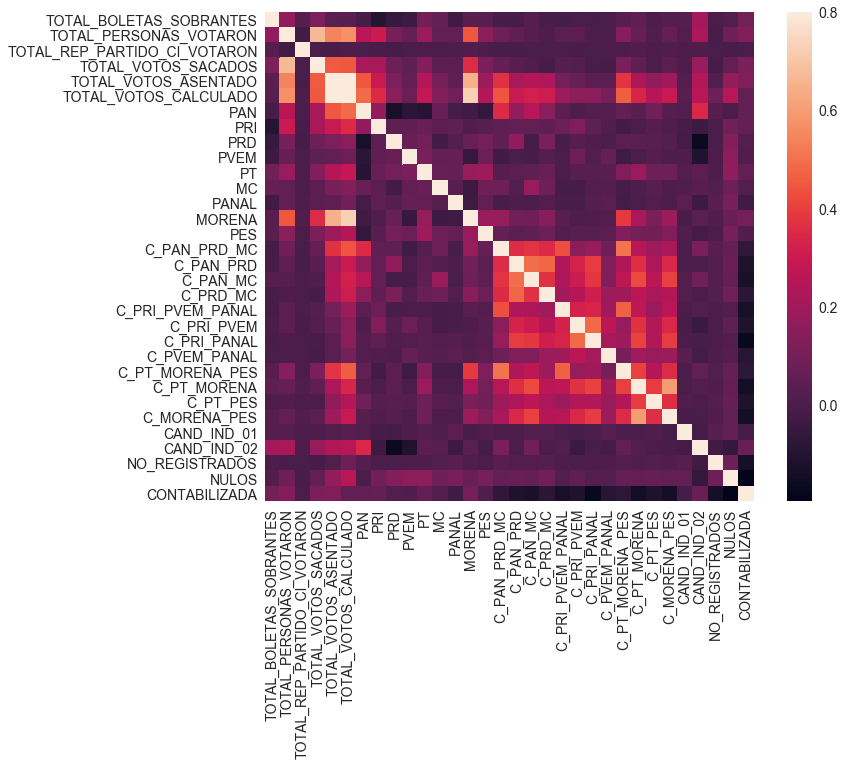

In [271]:
# Correlation matrix
corrmat = dYR3.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Isolation Forest

In [135]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor ## Only available with scikit-learn 0.19 and later
from sklearn.cluster import KMeans

In [136]:
from sklearn.model_selection import train_test_split

In [138]:
#dYR3=pd.DataFrame(datos)
#$del dYR3['anomaly']
y_true=dYR3['CONTABILIZADA']
dYR3_data=dYR3.drop('CONTABILIZADA',1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(dYR3_data, y_true, test_size=0.3, random_state=42)

In [158]:
 #normalizando
def preprocess(dYR3_data):
    for col in dYR3_data:
        dYR3_data[col]=(dYR3_data[col]-np.min(dYR3_data[col]))/(np.max(dYR3_data[col])-np.min(dYR3_data[col]))
    return

In [159]:

def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=dYR3_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

In [160]:
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [161]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

In [162]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)#,behaviour="new")

In [163]:
X_train.head(5)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PRI_PANAL,C_PVEM_PANAL,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS
99514,0.0,0.0,0.0,0.0,280.0,279.0,29.0,28.0,2.0,4.0,...,0.0,0.0,8.0,1.0,0.0,1.0,1.0,3.0,0.0,8.0
63858,371.0,328.0,6.0,334.0,334.0,334.0,51.0,14.0,4.0,2.0,...,0.0,0.0,6.0,4.0,0.0,0.0,0.0,2.0,0.0,18.0
97397,270.0,363.0,0.0,363.0,363.0,364.0,157.0,17.0,2.0,9.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,11.0,0.0,18.0
85252,243.0,294.0,0.0,294.0,294.0,291.0,25.0,59.0,5.0,3.0,...,1.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0
50996,166.0,518.0,4.0,523.0,523.0,523.0,96.0,85.0,12.0,8.0,...,0.0,0.0,7.0,5.0,0.0,3.0,0.0,33.0,0.0,11.0


In [164]:
%%timeit
if_mdlLst=train(X_train,alg)


13.5 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [165]:
if_mdlLst=train(X_train,alg)
if_mdlLst

[IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0)]

In [166]:
%%timeit
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

7.53 s ± 68.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [186]:
 
gt=X_test
gt['anomaly_IsolationForest']=if_y_pred_class
gt.head(2)
gt.to_csv('isolationForest.csv') 

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [167]:
if_mdlLst

[IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0),
 IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
         max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
         verbose=0)]

In [168]:
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

 
#Creando las etiquetas basadas en la funcion de acuerdo a sus rangos 
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [190]:
 
gt=X_test
gt['anomaly_IsolationForest']=if_y_pred_class
gt.head(2)
gt.to_csv('isolationForest.csv') 

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
roc_auc_score(y_test, if_y_pred_class)

0.3911877164688695

In [170]:
if_cm=confusion_matrix(y_test, if_y_pred_class)

In [181]:
if_y_pred_class

array([0., 0., 0., ..., 0., 0., 0.])

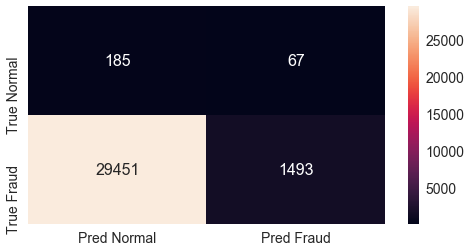

In [191]:
import seaborn as sn
     
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

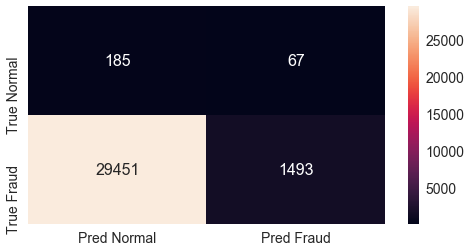

In [171]:
import seaborn as sn
     
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

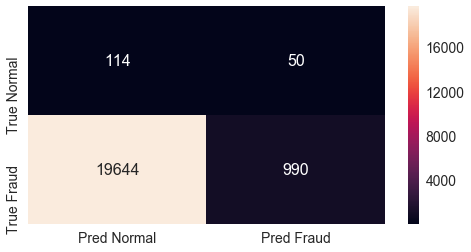

In [154]:
import seaborn as sn
     
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# K-means

In [214]:
%%timeit

kmeans = KMeans(n_clusters=8, random_state=42,n_jobs=-1).fit(X_train)

5.92 s ± 74.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [215]:
kmeans = KMeans(n_clusters=8, random_state=42,n_jobs=-1).fit(X_train)

In [222]:
del X_test['anomaly_IsolationForest']

In [223]:
%%timeit
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

226 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [228]:
gt=X_test
gt['anomaly_kmeans']=km_y_pred
gt.head(2)
gt.to_csv('anomaly_kmeans.csv') 

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [224]:
roc_auc_score(y_test, km_y_pred)

0.28317231537565035

In [225]:
f1_score(y_test, km_y_pred)

0.0885429485601772

In [226]:
km_cm=confusion_matrix(y_test, km_y_pred)

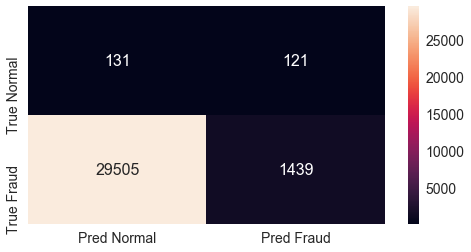

In [227]:
df_cm = pd.DataFrame(km_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

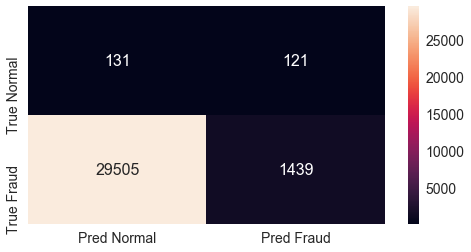

In [179]:
df_cm = pd.DataFrame(km_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# LOF

In [239]:
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, \
                   metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=-1)

In [240]:
%%timeit
clf.fit(X_test)

4.65 s ± 304 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [241]:
clf.fit(X_test)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=-1,
          n_neighbors=20, p=2)

In [242]:
%%timeit
lof_y_pred=clf.negative_outlier_factor_

#Creando las etiquetas de anomalías dependiendo 
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

976 µs ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [243]:
lof_y_pred=clf.negative_outlier_factor_

#Creando las clases de las etiquetas de las funciones
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [249]:
gt3=X_test
gt3['anomaly_lof']=lof_y_pred_class
gt3.head(2)
gt3.to_csv('anomaly_lof.csv') 

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [244]:
roc_auc_score(y_test, lof_y_pred_class)

0.5252068252326784

In [245]:
f1_score(y_test, lof_y_pred_class)

0.09598818606940684

In [246]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

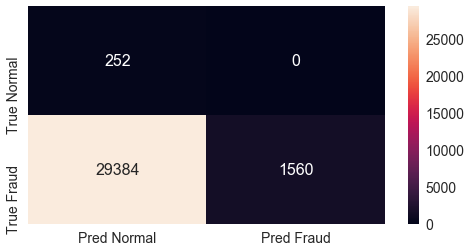

In [247]:
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

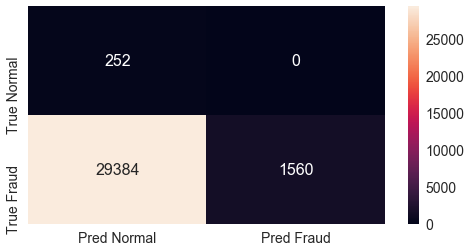

In [248]:
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# One-Class SVM

In [250]:
alg=OneClassSVM(kernel='linear',gamma='auto', coef0=0.0, tol=0.001, nu=0.5, \
                shrinking=True, cache_size=500, verbose=False, max_iter=-1)

In [251]:
%%timeit
osvm_mdlLst=train(X_train,alg)

19.2 s ± 585 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [256]:
del X_test['anomaly_kmeans']
del X_test['anomaly_lof']


In [257]:
osvm_mdlLst=train(X_train,alg)

In [258]:
%%timeit
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

25.8 s ± 504 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [259]:
%%timeit
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

25.5 s ± 160 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [260]:
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

In [261]:
gt4=X_test
gt4['anomaly_SVM']=lof_y_pred_class
gt4.head(2)
gt4.to_csv('anomaly_SVM.csv') 

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [262]:
roc_auc_score(y_test, osvm_y_pred_class)

0.37243751128510694

In [263]:
f1_score(y_test, osvm_y_pred_class)

0.6664239516854413

In [264]:
osvm_cm=confusion_matrix(y_test, osvm_y_pred_class)

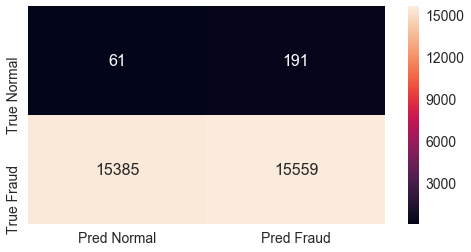

In [265]:
df_cm = pd.DataFrame(osvm_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

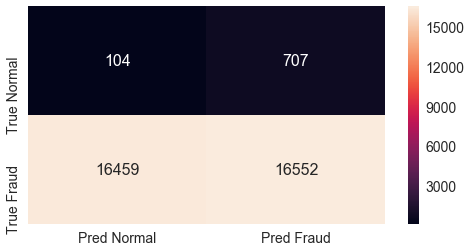

In [75]:
df_cm = pd.DataFrame(osvm_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# SOM

In [76]:
 # split dataset into X & Y, not trying to do supervised learning or 0 or 1 classification
# making distinction of approved and not approved customers, train SOM we will only use
# X and there's no dependent variable 

# Feature Scaling - compulsory for deep learning becase we're starting with a high 
# dimensional dataset with lots of non-linear relationship and it will be much easier
# for our deep learning models to be trained if the features are scaled. 
# use normalization all features from 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))



In [77]:
# fit sc object to X so sc gets all info (min and max) and all info for normalization
# apply normalization to X, fit method returns normalized version of X
XSOM = sc.fit_transform(X_test)

In [272]:
!pip install minisom

You should consider upgrading via the 'c:\users\jess\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
# Training the SOM
# Unsupervised Learning, we don't consider
# sigma is the radius of the different neighborhoods
# learning weight, hyperparameter decides how much weight
# higher the learning rates, faster will be convergence
# lower the learning rate, the slower it takes for SOM to build
from minisom import MiniSom
y=10
som = MiniSom(x = 10, y = 10, input_len = 32, sigma = 1.0, learning_rate = 0.5)



In [85]:
# randomly initialize the weight vectors to small numbers close to 0
som.random_weights_init(XSOM)

In [86]:
# train som on X, matrix of features and patterns recognized
som.train_random( XSOM, num_iteration = 100)



TypeError: 'int' object is not subscriptable

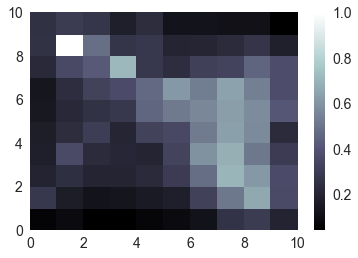

In [87]:
# Visualising the results
# two-dimensional grid of the winning nodes
# get M-ID Mean Inter-neruon Distances, Inside the neighborhood, radius, winning 
# higher MID, winning, outlier neuron far from the general neuron, fraud, winning nodes
# with the higher M-ID. Winning node will use different nodes

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(XSOM):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# CONCLUSION

In [268]:
## Performance Plot
train_times={
    'Isolation Forest': 13.5,
    'KMeans':.226,
    'LOF':4.65,
    'OneClass SVM':19.2
}

prediction_times={
    'Isolation Forest':7.53,
    'KMeans':0.226,
    'LOF':0.000976,
    'OneClass SVM': 25.8
}

Text(0.5,0,'Tiempo en segundos')

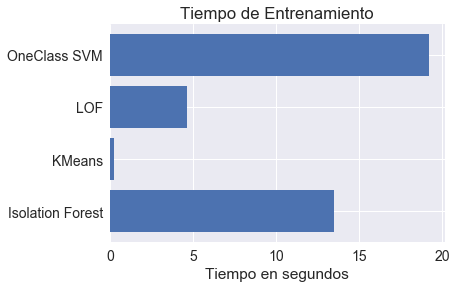

In [269]:
plt.title('Tiempo de Entrenamiento')
plt.barh(range(len(train_times)), list(train_times.values()), align='center')
plt.yticks(range(len(train_times)), list(train_times.keys()))
plt.xlabel('Tiempo en segundos')

Text(0.5,0,'Tiempo en segundos')

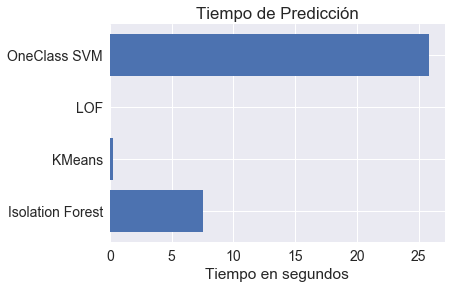

In [273]:
plt.title('Tiempo de Predicción')
plt.barh(range(len(prediction_times)), list(prediction_times.values()), align='center')
plt.yticks(range(len(prediction_times)), list(prediction_times.keys()))
plt.xlabel('Tiempo en segundos')

In [73]:
dYR3.head(5)

,TOTAL_BOLETAS_SOBRANTES,TOTAL_PERSONAS_VOTARON,TOTAL_REP_PARTIDO_CI_VOTARON,TOTAL_VOTOS_SACADOS,TOTAL_VOTOS_ASENTADO,TOTAL_VOTOS_CALCULADO,PAN,PRI,PRD,PVEM,...,C_PT_MORENA_PES,C_PT_MORENA,C_PT_PES,C_MORENA_PES,CAND_IND_01,CAND_IND_02,NO_REGISTRADOS,NULOS,CONTABILIZADA,anomaly
0,0.0,0.0,0.0,0.0,837.0,837.0,247.0,37.0,8.0,1.0,...,47.0,7.0,1.0,1.0,0.0,26.0,5.0,9.0,1.0,-1
1,269.0,333.0,4.0,337.0,337.0,337.0,62.0,43.0,2.0,1.0,...,5.0,1.0,0.0,1.0,0.0,14.0,0.0,20.0,1.0,1
2,269.0,335.0,1.0,335.0,335.0,335.0,81.0,36.0,1.0,3.0,...,1.0,2.0,0.0,0.0,0.0,18.0,0.0,6.0,1.0,1
3,300.0,304.0,1.0,305.0,305.0,305.0,73.0,28.0,2.0,3.0,...,5.0,0.0,0.0,2.0,0.0,13.0,0.0,7.0,1.0,1
4,242.0,321.0,7.0,328.0,328.0,328.0,75.0,43.0,2.0,5.0,...,0.0,3.0,0.0,0.0,0.0,14.0,0.0,6.0,1.0,1


In [77]:
# mediana
np.var(dYR3.TOTAL_BOLETAS_SOBRANTES) 

9760.085251194823

In [79]:

# Ejemplos de estadistica descriptiva con python

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
stats.mode(dYR3.TOTAL_BOLETAS_SOBRANTES) 

ModeResult(mode=array([0.]), count=array([4883]))

In [80]:
np.corrcoef(dYR3.TOTAL_BOLETAS_SOBRANTES) 

1.0

In [81]:

# covarianza
np.cov(dYR3.TOTAL_BOLETAS_SOBRANTES)  # calcula matriz de covarianza

array(9760.17182513)

In [276]:
# media arítmetica
dYR3.mean()

TOTAL_BOLETAS_SOBRANTES         224.045852
TOTAL_PERSONAS_VOTARON          347.155559
TOTAL_REP_PARTIDO_CI_VOTARON      5.578732
TOTAL_VOTOS_SACADOS             329.163580
TOTAL_VOTOS_ASENTADO            350.582675
TOTAL_VOTOS_CALCULADO           362.590714
PAN                              63.558902
PRI                              47.460418
PRD                               9.200806
PVEM                              5.471881
PT                               17.554075
MC                                5.372492
PANAL                             3.297232
MORENA                          157.598619
PES                               6.428010
C_PAN_PRD_MC                      2.031225
C_PAN_PRD                         0.704403
C_PAN_MC                          0.495894
C_PRD_MC                          0.135903
C_PRI_PVEM_PANAL                  0.961101
C_PRI_PVEM                        0.934799
C_PRI_PANAL                       0.234887
C_PVEM_PANAL                      0.099831
C_PT_MORENA

In [277]:
np.mean(dYR3) # Mismo resultado desde la funcion de numpy

TOTAL_BOLETAS_SOBRANTES         224.045852
TOTAL_PERSONAS_VOTARON          347.155559
TOTAL_REP_PARTIDO_CI_VOTARON      5.578732
TOTAL_VOTOS_SACADOS             329.163580
TOTAL_VOTOS_ASENTADO            350.582675
TOTAL_VOTOS_CALCULADO           362.590714
PAN                              63.558902
PRI                              47.460418
PRD                               9.200806
PVEM                              5.471881
PT                               17.554075
MC                                5.372492
PANAL                             3.297232
MORENA                          157.598619
PES                               6.428010
C_PAN_PRD_MC                      2.031225
C_PAN_PRD                         0.704403
C_PAN_MC                          0.495894
C_PRD_MC                          0.135903
C_PRI_PVEM_PANAL                  0.961101
C_PRI_PVEM                        0.934799
C_PRI_PANAL                       0.234887
C_PVEM_PANAL                      0.099831
C_PT_MORENA

In [281]:
dYR3.mean(axis=1) # media aritmetica de cada fila

0         78.50000
1         61.09375
2         60.81250
3         57.06250
4         58.84375
5         57.75000
6         47.46875
7         65.71875
8         60.96875
9         78.75000
10        77.25000
11        80.96875
12        65.21875
13        53.03125
14        86.25000
15        88.09375
16        91.65625
17        90.03125
18        69.68750
19        69.78125
20        71.18750
21        64.21875
22        77.25000
23        80.71875
24        55.65625
25        61.31250
26        66.93750
27        72.56250
28        50.65625
29        52.00000
            ...   
103956    45.68750
103957    52.90625
103958    52.12500
103959    54.90625
103960    42.31250
103961    55.75000
103962    61.31250
103963    49.81250
103964    49.28125
103965    44.00000
103966    44.25000
103967    55.37500
103968    51.09375
103969    79.53125
103970    52.90625
103971    43.37500
103972    53.50000
103973    45.15625
103974    52.96875
103975    69.62500
103976    52.28125
103977    54

In [282]:

# mediana
np.median(dYR3)

2.0

In [283]:
np.median(dYR3, 0) # mediana de cada columna

array([222., 362.,   4., 358., 365., 368.,  50.,  41.,   4.,   2.,  15.,
         3.,   2., 156.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   6.,   2.,   0.,   1.,   0.,  16.,   0.,   8.,   1.])

In [284]:
 # Desviación típica
np.std(dYR3)

TOTAL_BOLETAS_SOBRANTES          96.132609
TOTAL_PERSONAS_VOTARON          118.191016
TOTAL_REP_PARTIDO_CI_VOTARON     26.195667
TOTAL_VOTOS_SACADOS             144.531819
TOTAL_VOTOS_ASENTADO            150.787671
TOTAL_VOTOS_CALCULADO           138.588243
PAN                              58.695675
PRI                              31.700789
PRD                              16.677850
PVEM                             13.161519
PT                               13.976995
MC                               10.819129
PANAL                            10.852058
MORENA                           87.670674
PES                               7.802538
C_PAN_PRD_MC                      5.488123
C_PAN_PRD                         2.300920
C_PAN_MC                          1.855778
C_PRD_MC                          1.293151
C_PRI_PVEM_PANAL                  4.295595
C_PRI_PVEM                        2.879106
C_PRI_PANAL                       2.037565
C_PVEM_PANAL                      1.595662
C_PT_MORENA

In [285]:

np.std(dYR3, 0) # Desviación típica de cada columna

TOTAL_BOLETAS_SOBRANTES          96.132609
TOTAL_PERSONAS_VOTARON          118.191016
TOTAL_REP_PARTIDO_CI_VOTARON     26.195667
TOTAL_VOTOS_SACADOS             144.531819
TOTAL_VOTOS_ASENTADO            150.787671
TOTAL_VOTOS_CALCULADO           138.588243
PAN                              58.695675
PRI                              31.700789
PRD                              16.677850
PVEM                             13.161519
PT                               13.976995
MC                               10.819129
PANAL                            10.852058
MORENA                           87.670674
PES                               7.802538
C_PAN_PRD_MC                      5.488123
C_PAN_PRD                         2.300920
C_PAN_MC                          1.855778
C_PRD_MC                          1.293151
C_PRI_PVEM_PANAL                  4.295595
C_PRI_PVEM                        2.879106
C_PRI_PANAL                       2.037565
C_PVEM_PANAL                      1.595662
C_PT_MORENA

In [286]:
# varianza
np.var(dYR3) 

TOTAL_BOLETAS_SOBRANTES          9241.478501
TOTAL_PERSONAS_VOTARON          13969.116205
TOTAL_REP_PARTIDO_CI_VOTARON      686.212951
TOTAL_VOTOS_SACADOS             20889.446575
TOTAL_VOTOS_ASENTADO            22736.921622
TOTAL_VOTOS_CALCULADO           19206.701160
PAN                              3445.182233
PRI                              1004.940046
PRD                               278.150693
PVEM                              173.225572
PT                                195.356379
MC                                117.053544
PANAL                             117.767153
MORENA                           7686.147089
PES                                60.879595
C_PAN_PRD_MC                       30.119493
C_PAN_PRD                           5.294231
C_PAN_MC                            3.443913
C_PRD_MC                            1.672239
C_PRI_PVEM_PANAL                   18.452134
C_PRI_PVEM                          8.289250
C_PRI_PANAL                         4.151673
C_PVEM_PAN

In [287]:
np.var(dYR3, 0) # varianza de cada columna

TOTAL_BOLETAS_SOBRANTES          9241.478501
TOTAL_PERSONAS_VOTARON          13969.116205
TOTAL_REP_PARTIDO_CI_VOTARON      686.212951
TOTAL_VOTOS_SACADOS             20889.446575
TOTAL_VOTOS_ASENTADO            22736.921622
TOTAL_VOTOS_CALCULADO           19206.701160
PAN                              3445.182233
PRI                              1004.940046
PRD                               278.150693
PVEM                              173.225572
PT                                195.356379
MC                                117.053544
PANAL                             117.767153
MORENA                           7686.147089
PES                                60.879595
C_PAN_PRD_MC                       30.119493
C_PAN_PRD                           5.294231
C_PAN_MC                            3.443913
C_PRD_MC                            1.672239
C_PRI_PVEM_PANAL                   18.452134
C_PRI_PVEM                          8.289250
C_PRI_PANAL                         4.151673
C_PVEM_PAN

In [293]:
from scipy import stats # importando scipy.stats
# moda
stats.mode(dYR3[0:5]) # Calcula la moda de cada columna
# el 2do array devuelve la frecuencia.

ModeResult(mode=array([[269.,   0.,   1.,   0., 305., 305.,  62.,  43.,   2.,   1.,   3.,
          4.,   3., 136.,   5.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   5.,   0.,   0.,   0.,   0.,  14.,   0.,   6.,   1.]]), count=array([[2, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 3, 2, 1, 2, 2, 3, 3, 4, 3, 4, 3,
        5, 2, 1, 4, 2, 5, 2, 4, 2, 5]]))

In [292]:
# correlacion
np.cov(dYR3[0:5]) # Crea matriz de correlación.

array([[45603.35483871, 15702.79032258, 15819.96774194, 14158.38709677,
        15456.5       ],
       [15702.79032258, 14024.47479839, 14041.82459677, 13099.38104839,
        13505.53125   ],
       [15819.96774194, 14041.82459677, 14085.70564516, 13133.36693548,
        13543.80846774],
       [14158.38709677, 13099.38104839, 13133.36693548, 12341.60887097,
        12595.6875    ],
       [15456.5       , 13505.53125   , 13543.80846774, 12595.6875    ,
        13043.74899194]])

In [297]:
np.var(dYR3, 0) # varianza de cada columna

TOTAL_BOLETAS_SOBRANTES          9241.478501
TOTAL_PERSONAS_VOTARON          13969.116205
TOTAL_REP_PARTIDO_CI_VOTARON      686.212951
TOTAL_VOTOS_SACADOS             20889.446575
TOTAL_VOTOS_ASENTADO            22736.921622
TOTAL_VOTOS_CALCULADO           19206.701160
PAN                              3445.182233
PRI                              1004.940046
PRD                               278.150693
PVEM                              173.225572
PT                                195.356379
MC                                117.053544
PANAL                             117.767153
MORENA                           7686.147089
PES                                60.879595
C_PAN_PRD_MC                       30.119493
C_PAN_PRD                           5.294231
C_PAN_MC                            3.443913
C_PRD_MC                            1.672239
C_PRI_PVEM_PANAL                   18.452134
C_PRI_PVEM                          8.289250
C_PRI_PANAL                         4.151673
C_PVEM_PAN

In [ ]:
 Ejemplo de grafico de cajas en python

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [dYR3[0], dYR3[1], dYR3[2], dYR3[3]]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=

In [294]:
# Graficos embebidos.
%matplotlib inline  
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [295]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

In [ ]:
plt.boxplot(d2)
plt.show()

C:\Users\Jess\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KeyboardInterrupt: 

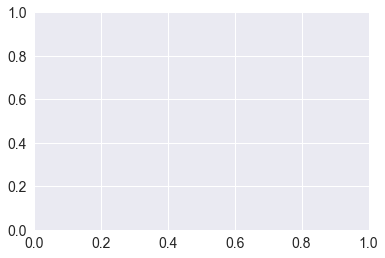

In [296]:

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(dYR3, 30, normed=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [ ]:

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos